In [2]:

%pip install tensorflow matplotlib numpy pillow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 620.4/620.4 MB 924.4 kB/s  0:10:380:00:0100:17
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 932.3 kB/s  0:00:07 eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.0/5.0 MB 912.8 kB/s  0:00:05 eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 963.5 kB/s  0:00:05 eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 915.1 kB/s  0:00:07m0:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.7/8.7 MB 955.3 kB/s  0:00:09 eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.8/16.8 MB 958.7 kB/s  0:00:17m0:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.0/7.0 MB 944.8 kB/s  0:00:07 eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 920.4 kB/s  0:00:05 eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 900.7 kB/s  0:00:05 eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 852.0 kB/s  0:00:01 eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [3]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense


2025-11-19 11:40:38.200372: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2025-11-19 11:40:38.262494: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-11-19 11:40:39.637869: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2025-11-19 11:40:39.637869: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.


In [4]:
import os

# Tentukan path dataset lokal
dataset_path = "/home/arilix/Documents/Classification CNN/Polusi udara/Dataset"
print("Dataset path:", dataset_path)
print("Folder dalam dataset:", os.listdir(dataset_path))

Dataset path: /home/arilix/Documents/Classification CNN/Polusi udara/Dataset
Folder dalam dataset: ['validasi', 'bahan', 'Model Done', 'latih']


In [10]:
# Path untuk data
data_dir = '/home/arilix/Documents/Classification CNN/Polusi udara/Dataset/bahan'

print("Data directory:", data_dir)

Data directory: /home/arilix/Documents/Classification CNN/Polusi udara/Dataset/bahan


In [6]:
train_datagen = ImageDataGenerator(rescale=1.0/255, validation_split=0.2)


In [7]:
validation_datagen = ImageDataGenerator(rescale=1.0/255.0)


In [11]:
# Generator untuk training data (80% dari data)
train_generator = train_datagen.flow_from_directory(
    data_dir,
    target_size=(150, 150),  # Ukuran gambar 
    batch_size=32,
    class_mode='binary',  
    subset='training'  # Ambil 80% untuk training
)

print(f"Class indices: {train_generator.class_indices}")

Found 172 images belonging to 2 classes.
Class indices: {'nopolusi': 0, 'polusi': 1}
Class indices: {'nopolusi': 0, 'polusi': 1}


In [12]:
# Generator untuk validation data (20% dari data)
validation_generator = train_datagen.flow_from_directory(
    data_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary',
    subset='validation'  # Ambil 20% untuk validasi
)

print(f"Training samples: {train_generator.samples}")
print(f"Validation samples: {validation_generator.samples}")

Found 43 images belonging to 2 classes.
Training samples: 172
Validation samples: 43
Training samples: 172
Validation samples: 43


In [13]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(1, activation='sigmoid')  # 1 neuron untuk 2 kelas (binary)
])

/home/arilix/Documents/Classification CNN/Polusi udara/.venv/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2025-11-19 11:42:43.393968: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


In [14]:
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])


In [15]:
history = model.fit(
    train_generator,
    steps_per_epoch=len(train_generator),
    epochs=10,
    validation_data=validation_generator,
    validation_steps=len(validation_generator)
)

Epoch 1/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 4s 494ms/step - accuracy: 0.5291 - loss: 1.8041 - val_accuracy: 0.4884 - val_loss: 0.7026
Epoch 2/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 4s 494ms/step - accuracy: 0.5291 - loss: 1.8041 - val_accuracy: 0.4884 - val_loss: 0.7026
Epoch 2/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 3s 472ms/step - accuracy: 0.5640 - loss: 0.6415 - val_accuracy: 0.8140 - val_loss: 0.5864
Epoch 3/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 3s 472ms/step - accuracy: 0.5640 - loss: 0.6415 - val_accuracy: 0.8140 - val_loss: 0.5864
Epoch 3/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 3s 495ms/step - accuracy: 0.7791 - loss: 0.5071 - val_accuracy: 0.7907 - val_loss: 0.4555
Epoch 4/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 3s 495ms/step - accuracy: 0.7791 - loss: 0.5071 - val_accuracy: 0.7907 - val_loss: 0.4555
Epoch 4/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 3s 515ms/step - accuracy: 0.7849 - loss: 0.4720 - val_accuracy: 0.8372 - val_loss: 0.3594
Epoch 5/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 3s 515ms/step - accuracy: 0.7849 - loss: 0.4720 - val_accuracy: 0.8372 - val_loss:

In [16]:
# Simpan model ke folder lokal
model_save_path = "/home/arilix/Documents/Classification CNN/Polusi udara/Dataset/Model Done/trial.keras"
model.save(model_save_path)
print(f"Model berhasil disimpan di: {model_save_path}")

Model berhasil disimpan di: /home/arilix/Documents/Classification CNN/Polusi udara/Dataset/Model Done/trial.keras


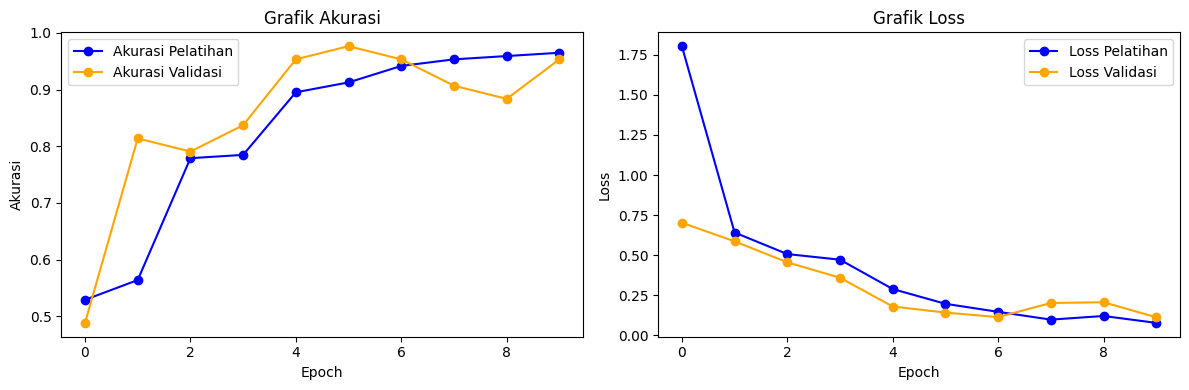

In [19]:
import matplotlib.pyplot as plt

# Ambil data akurasi dan loss dari history pelatihan
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
train_loss = history.history['loss']
val_loss = history.history['val_loss']

# Plot grafik akurasi
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(train_acc, label='Akurasi Pelatihan', color='blue', marker='o')
plt.plot(val_acc, label='Akurasi Validasi', color='orange', marker='o')
plt.title('Grafik Akurasi')
plt.xlabel('Epoch')
plt.ylabel('Akurasi')
plt.legend()

# Plot grafik loss
plt.subplot(1, 2, 2)
plt.plot(train_loss, label='Loss Pelatihan', color='blue', marker='o')
plt.plot(val_loss, label='Loss Validasi', color='orange', marker='o')
plt.title('Grafik Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import numpy as np
import os

model_path = "/home/arilix/Documents/Classification CNN/Polusi udara/Dataset/Model Done/trial.keras"

image_path = "/home/arilix/Documents/Classification CNN/Polusi udara/Dataset/bahan/polusi/6.jpg"

if not os.path.exists(image_path):
    print(f"Error: File tidak ditemukan di {image_path}")
    print("\nGunakan salah satu gambar dari dataset:")
    print("- Dataset/bahan/polusi/[nama_file].jpg")
    print("- Dataset/bahan/nopolusi/[nama_file].jpg")
else:
    model = tf.keras.models.load_model(model_path)

    # Memuat gambar yang akan diuji
    img = load_img(image_path, target_size=(150, 150))
    img_array = img_to_array(img)
    img_array = img_array / 255.0  # Normalisasi
    img_array = np.expand_dims(img_array, axis=0)  # Menambahkan dimensi batch

    # Melakukan prediksi
    prediction = model.predict(img_array)

    # Menampilkan hasil prediksi
    print(f"Testing image: {image_path}")
    if prediction[0][0] > 0.5:  # Menentukan threshold untuk klasifikasi
        print("Prediksi: Polusi Udara")
        print(f"Confidence: {prediction[0][0]*100:.2f}%")
    else:
        print("Prediksi: Udara Bersih (No Polusi)")
        print(f"Confidence: {(1-prediction[0][0])*100:.2f}%")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
Testing image: /home/arilix/Documents/Classification CNN/Polusi udara/Dataset/bahan/polusi/6.jpg
Prediksi: Polusi Udara
Confidence: 99.76%
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
Testing image: /home/arilix/Documents/Classification CNN/Polusi udara/Dataset/bahan/polusi/6.jpg
Prediksi: Polusi Udara
Confidence: 99.76%


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


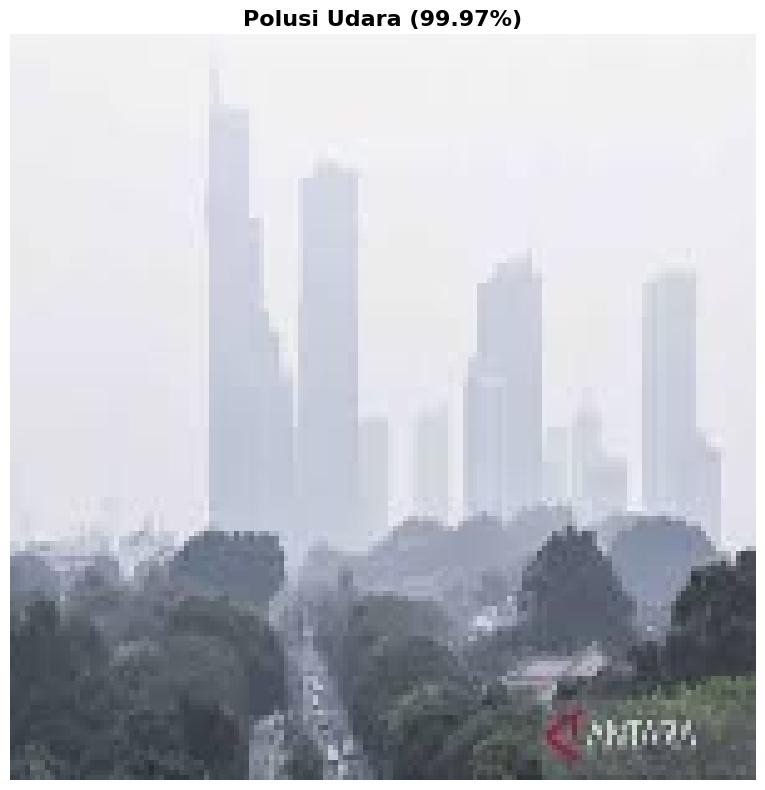

File: 7.jpg


In [31]:
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import numpy as np
import os

model_path = "/home/arilix/Documents/Classification CNN/Polusi udara/Dataset/Model Done/trial.keras"

# Ganti dengan path gambar yang ingin diuji
image_path = "/home/arilix/Documents/Classification CNN/Polusi udara/Dataset/bahan/polusi/7.jpg"

# Cek apakah file gambar ada
if not os.path.exists(image_path):
    print(f"Error: File tidak ditemukan di {image_path}")
    print("\nGunakan salah satu gambar dari dataset:")
    print("- Dataset/bahan/polusi/[nama_file].jpg")
    print("- Dataset/bahan/nopolusi/[nama_file].jpg")
else:
    model = tf.keras.models.load_model(model_path)

    img = load_img(image_path, target_size=(150, 150))
    img_array = img_to_array(img)
    img_array_normalized = img_array / 255.0
    img_array_normalized = np.expand_dims(img_array_normalized, axis=0) 

    # Melakukan prediksi
    prediction = model.predict(img_array_normalized)

    if prediction[0][0] > 0.5:  # Menentukan threshold untuk klasifikasi
        label = f"Polusi Udara ({prediction[0][0]*100:.2f}%)"
    else:
        label = f"Udara Bersih ({(1-prediction[0][0])*100:.2f}%)"

    plt.figure(figsize=(8, 8))
    plt.imshow(img)
    plt.title(label, fontsize=16, fontweight='bold')
    plt.axis("off") 
    plt.tight_layout()
    plt.show()
    
    print(f"File: {os.path.basename(image_path)}")